**Spectral Clustering Steps:**


*   Construct a similarity graph
*   Determine the Adjacency Degree & Laplacian matrices
*   Compute the eigenvectors of the Laplacian matrix
*   Using the 2nd smallest eigenvector as input to train a k-means model 



Importing necessary libraries

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Creating a sample dataset with 3 clusters

Text(0, 0.5, 'Height')

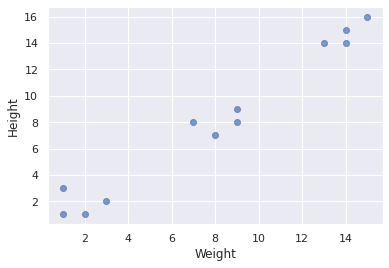

In [43]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

1. Construction of a similarity matrix (using Euclidean distances)
2. Using similarity matrix to create an adjacency matrix (create an edge if distance 2 nodes below a certain threshold)

In [51]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
np. fill_diagonal(W, 0) 
print(W)

[[0 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 1 1 1 0]]


Use adjacency matrix to create a graph

In [17]:
#method for displaying a graph
#def draw_graph(G):
    #pos = nx.spring_layout(G)
    #nx.draw_networkx_nodes(G, pos)
    #nx.draw_networkx_labels(G, pos)
    #nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [41]:
def show_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=100)
    plt.show()

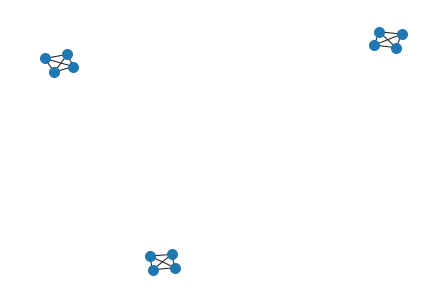

In [52]:
show_graph(W)

Construction of degree and Laplacian matrix

In [46]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[3 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 3]]
laplacian matrix:
[[ 3 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1  3 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  4 -1 -1  0  0  0]
 [ 0  0  0  0 -1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  4 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  3]]


Once we have the laplacian matrix, we can take advantage of one of its special properties to classify our data - *if the graph has K connected components, then the Laplacian has K eigenvectors with an eigenvalue of 0*.

In [47]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.000 -0.000 4.000 4.000 -0.000 0.354 5.646 4.000 4.000 4.000 4.000 4.000]
eigenvectors:
[[0.866 -0.500 -0.095 0.227 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 0.843 -0.325 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 -0.374 -0.598 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 -0.374 0.696 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.354 -0.383 0.143 -0.842 0.096 -0.090 -0.037
  0.069]
 [0.000 0.000 0.000 0.000 -0.354 -0.383 0.143 0.347 -0.445 0.753 0.100
  -0.230]
 [0.000 0.000 0.000 0.000 -0.354 -0.247 -0.663 0.149 0.538 -0.093 -0.349
  0.318]
 [0.000 0.000 0.000 0.000 -0.354 -0.383 0.143 0.347 -0.190 -0.570 0.287
  -0.157]
 [0.000 0.000 0.000 0.000 -0.354 0.247 0.663 0.149 0.538 -0.093 -0.349
  0.318]
 [0.000 0.000 0.000 0.000 -0.354 0.383 -0.143 -0.050 -0.001 0.203 0.713
  -0.666]
 [0.000 0.000 0.000 0.000 -0.354 0.383 -0.143 -0.050 -0.139 0.077 -0.392
  -0.151]
 [0.0

Using second smallest eigen-value for clustering

In [48]:
i = np.where(e < 0.5)[0]
print(i)

[1 4 5]


In [49]:
i = np.where(e < 0.5)[0]
U = np.array(v[:, i[2]].reshape(-1,1))
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

Second smallest Eigenvector (Fiedler vector)

In [53]:
v[:, i[2]]

array([0.000, 0.000, 0.000, 0.000, -0.383, -0.383, -0.247, -0.383, 0.247,
       0.383, 0.383, 0.383])

Using sci-kit's in-built implementation of spectral clustering

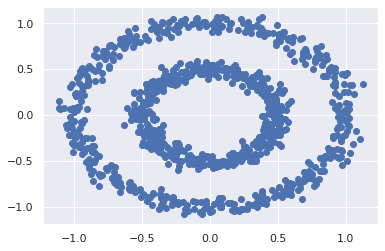

In [37]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


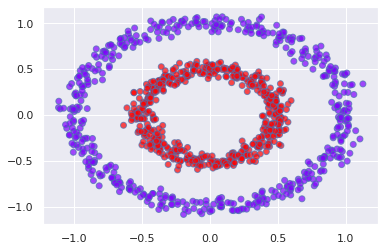

In [38]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

Comparison with k-means

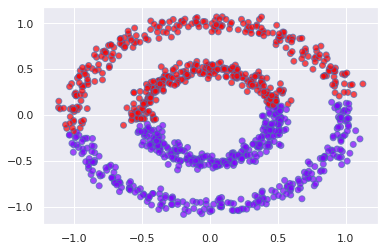

In [39]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')